# V-Values and RPE


We use the same environment as before to study two important quantities:
* the Reward Prediction Error (RPE)
* the V-value, V(s), sometimes called state-value.

<hr>

### V(s), informal definition.
With each state s, we can associate a quantity V(s). The V-value V(s) tells us the following: when the agent starts in state s and follows a (fixed) policy, how much reward will the agent collect, on average, until the end of the episode?

<hr>

In the previous exercise, you sampled full episodes and calculated the mean of the reward per episode. The value you've approximated was actually the value of the start-state, V(s0) for a fixed, random policy (that is, when the agent selects left/right with $p=0.5$). (A side note for the impatient: we considered $\gamma = 1.0$).



We state the definitions without further explanations and use them in the exercise below (see class script/slides).




# Specification of the task
Reward and Transitions.

In [1]:
# unchanged from prev. exercise.
rewards = [0, -1, 0, -10, 4, 3, 7, 5]
is_terminal = [False, False, False, True, False, True, True, True]
T = [ 
    [1, 2],  # in state s0, taking action a0 brings us to state s1, a1 to s2
    [3,4],   # in state s1, taking action a0 brings us to state s3, a1 to s4
    [6,5],   # in state s2, taking action a0 brings us to state s6, a1 to s5
    [-1, -1], # state s3 is a terminal state. next-state is undefined (we use -1 here).
    [7, 7],   # from state s4, both actions lead to state s7
    [-1, -1], # state s5 is a terminal state
    [-1, -1], # state s6 is a terminal state
    [-1, -1]  # state s7 is a terminal state
]


# Interlude: matplotlib
In this exercise you visualize results using matplotlib. <br>

Have a look a the examples here:
https://matplotlib.org/stable/gallery/index.html


The next code blocks first imports the package and renames pyplot as plt (this is a common alias). Also note the line <br>
%matplotlib inline <br>
This tells jupyter to render a graphic within the notebook (and not inside a new window). If you are writing a normal python script, you can omit that line. (Some background: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline )
<br>


In [2]:
# imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import random

Text(0, 0.5, '$i^2$')

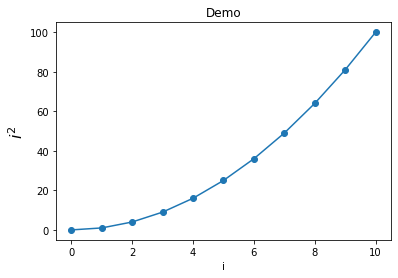

In [3]:
# a very short example to demonstrate plotting

# generate some data.
# here we use list comprehension
# https://www.w3schools.com/python/python_lists_comprehension.asp

data = [i*i for i in range(11) ]
    
plt.plot(data, 'o-')

plt.title("Demo")
plt.xlabel("i")
plt.ylabel("$i^2$", fontsize = 16)

# Exercise:


### Implement the Policy Evaluation Algorithm
* Calculate the V(s) for **every** state s
* Monitor the trial-by-trial RPE (at each time-step, at the current state. That is, at s, not s')
* Use matplotlib to visualize per state the evolution of a) the value and b) the RPE

### some remarks

Look at the following variables. V is a list of state values $V(s)$. The list is initized with 0s, and after applying policy evaluation, we expect V to converge to the correct V(s), e.g. we expect $V[0] \approx 1.75$, $V[1] \approx -0.5$, and so on. 

In addition to the final value V(s), it is interesting to study the evolution of V(s), that is, how the value evolve from the initial 0 to the final value. In order to monitor this evolution, we define an additional variable V_t. It is a list of lists. For each state, we keep track of the sequence of values. For example, the list at V[0] is a list that looks like this: $[0, 0.01, 0.02, ...  1.75]$.

A key learning signal in RL is the Reward Prediction Error RPE. We also monitor this quantity, at each state, over the entire learning process. To this end, we use the same data structure as we did for V_t.




[[], [-0.5, -0.4, 0.1, 0.05], [], [], [], [], [0.3], []]


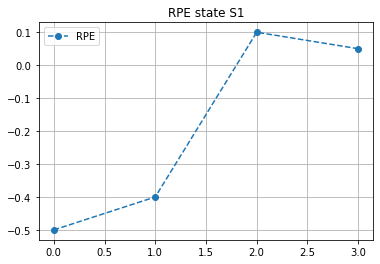

In [4]:
# short demo how to use lists and how to append values to lists
demo = [[],[],[],[],[],[],[],[]]

RPE = -0.5 
demo[1].append(RPE)
RPE = +0.3
demo[6].append(RPE)
demo[1].append(-0.4)
demo[1].append(+0.1)
demo[1].append(+0.05)

print(demo)

# plot
state = 1
plt.plot(demo[state], '--o', label='RPE')
plt.title('RPE state S{}'.format(state))
plt.grid()
plt.legend()


In [13]:
# The (current) value for each state
V = [0, 0 , 0, 0, 0, 0, 0, 0]

# The value at each state AND each time-step
V_t = [[0],[0],[0],[0],[0],[0],[0],[0]] # initialize with 0

# The trial-by-trial RPE, for each state (the state s, not s')
RPE_t = [[],[],[],[],[],[],[],[]]  # .append also works for empty lists 

# try different learning rates
alpha = 0.001

# ignore for now (it's the discount factor)
gamma = 1.0

In [15]:
for x in range(100000):
    # the agent starts at state s0.
    current_state = 0
    while (not is_terminal[current_state]):
        # In our environment, one can select from two actions, a0 and a1. Our agent follows a random policy where 
        # each action is take with equal probability:
        action = random.randint(0,1)

        # observe the next state and the reward
        next_state = T[current_state][action]
        r = rewards[next_state] # use lower case r for the immediate reward. Upper case R is the sum of rewards, called Return.
        
        # calculate RPE
        rpe = r + gamma * V[next_state] - V[current_state]
        V[current_state] += alpha * rpe
        
        # V_st+1
        V_t[current_state].append(V[current_state])
        
        # calculate RPE
        RPE_t[current_state].append(rpe)

        # go to next state
        current_state = next_state

        
print(len(RPE_t[0]))

100001


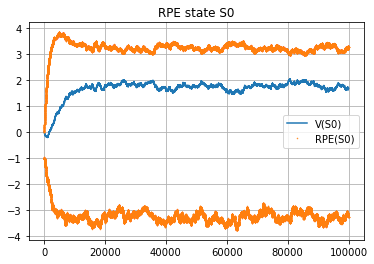

In [22]:
state = 0
plt.plot(V_t[state], label='V(S{})'.format(state), markersize=0.2)
plt.plot(RPE_t[state], 'o', label='RPE(S{})'.format(state), markersize=0.5)
plt.title('RPE state S{}'.format(state))
plt.legend()
plt.grid()

200001
